# Data label distribution
Code designed to see the data distribution from dataset regarding audio duration distribution. First we import libraries.

In [19]:
import os

import datasets

import numpy as np
import matplotlib.pyplot as plt 

We get the paths to load the dataset correctly. 

In [20]:
path = os.getcwd()
ROOT_DIR =  os.path.dirname(path)
RAW_DATA_DIR = os.path.join(ROOT_DIR, 'src', 'data', 'raw')
PROCESSED_DATA_DIR = os.path.join(ROOT_DIR, 'src', 'data', 'processed')

We load the dataset and we obtain the duration distribution.

In [21]:
audio_dataset = datasets.load_from_disk(RAW_DATA_DIR)
audios_duration = []
for split in audio_dataset.keys():
    print(f"Processing {split} split")
    for i in range(len(audio_dataset[split])):
        if audio_dataset[split][i]["audio"]["sampling_rate"] == 16000:
            audios_duration.append(len(audio_dataset[split][i]["audio"]["array"]))
        if i % 5000 == 0:
            print(f"Processed {i} audios")

Processing train split
Processed 0 audios
Processed 5000 audios
Processed 10000 audios
Processed 15000 audios
Processed 20000 audios
Processed 25000 audios
Processed 30000 audios
Processed 35000 audios
Processed 40000 audios
Processed 45000 audios
Processed 50000 audios
Processed 55000 audios
Processed 60000 audios
Processed 65000 audios
Processed 70000 audios
Processed 75000 audios
Processed 80000 audios
Processing validation split
Processed 0 audios
Processed 5000 audios
Processing test split
Processed 0 audios


And finally we plot the results. 

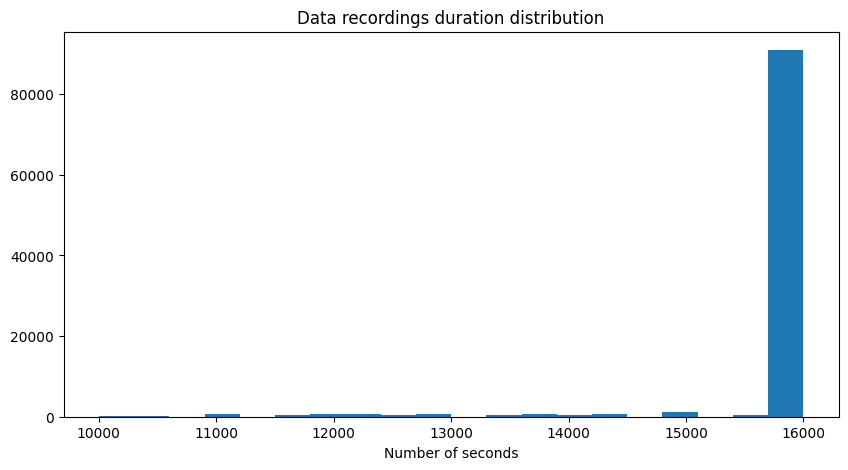

In [22]:
fig = plt.figure(figsize = (10, 5))
 
# Creating the hist plot
hist = plt.hist(audios_duration, bins = 20, range= [10000, 16000])

plt.xlabel("Number of seconds")
plt.title("Data recordings duration distribution")
plt.show()

We can see that the dataset has recordings outside one second (16000 samples). We must find a way to take resolve it during preprocessing. There are shorter and longer than 1 second (longer ones are fewer, so they are not focused in this histogram).